**Program 1**

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("/content/Loan_default.csv")
df.head()

,LoanID,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Education,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner,Default
0,I38PQUQS96,56,85994,50587,520,80,4,15.23,36,0.44,Bachelor's,Full-time,Divorced,Yes,Yes,Other,Yes,0
1,HPSK72WA7R,69,50432,124440,458,15,1,4.81,60,0.68,Master's,Full-time,Married,No,No,Other,Yes,0
2,C1OZ6DPJ8Y,46,84208,129188,451,26,3,21.17,24,0.31,Master's,Unemployed,Divorced,Yes,Yes,Auto,No,1
3,V2KKSFM3UN,32,31713,44799,743,0,3,7.07,24,0.23,High School,Full-time,Married,No,No,Business,No,0
4,EY08JDHTZP,60,20437,9139,633,8,4,6.51,48,0.73,Bachelor's,Unemployed,Divorced,No,Yes,Auto,No,0


In [15]:
print(df.isnull().sum())

LoanID            0
Age               0
Income            0
LoanAmount        0
CreditScore       0
MonthsEmployed    0
NumCreditLines    0
InterestRate      0
LoanTerm          0
DTIRatio          0
Education         0
EmploymentType    0
MaritalStatus     0
HasMortgage       0
HasDependents     0
LoanPurpose       0
HasCoSigner       0
Default           0
dtype: int64


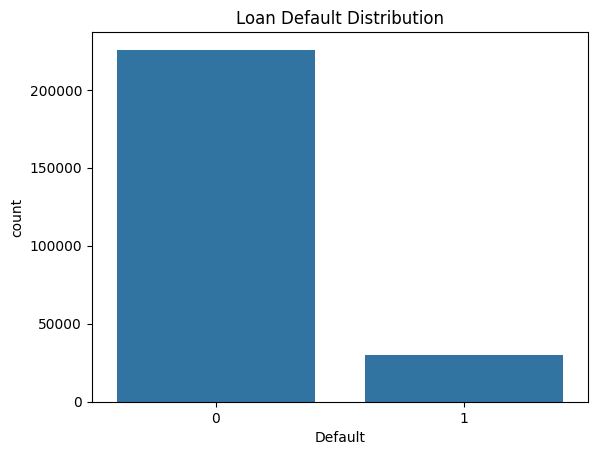

In [16]:
sns.countplot(x='Default', data=df)
plt.title("Loan Default Distribution")
plt.show()


The number of non-defaulters is higher than defaulters.Most customers repay their loans successfully, but a significant proportion still default

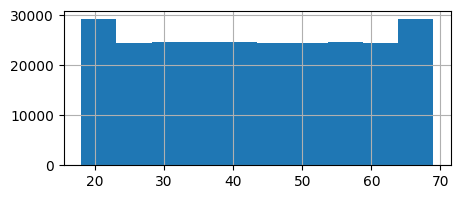

In [29]:
df['Age'].hist(figsize=(5,2))
plt.show()

Most borrowers fall within the working-age group.Default cases are spread across age groups without extreme concentration. Age alone is not a strong indicator of loan default and has limited discriminatory power compared to financial features.

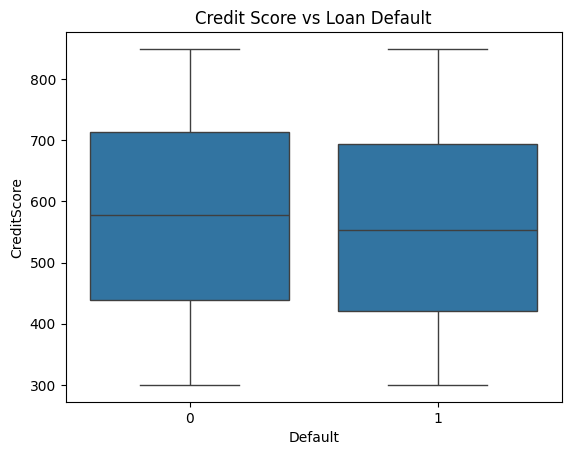

In [18]:
sns.boxplot(x='Default', y='CreditScore', data=df)
plt.title("Credit Score vs Loan Default")
plt.show()


Defaulters have significantly lower median credit scores. Non-defaulters show higher and more stable credit scores.Credit score is a strong predictor of default risk, as it captures past credit behavior and repayment history.

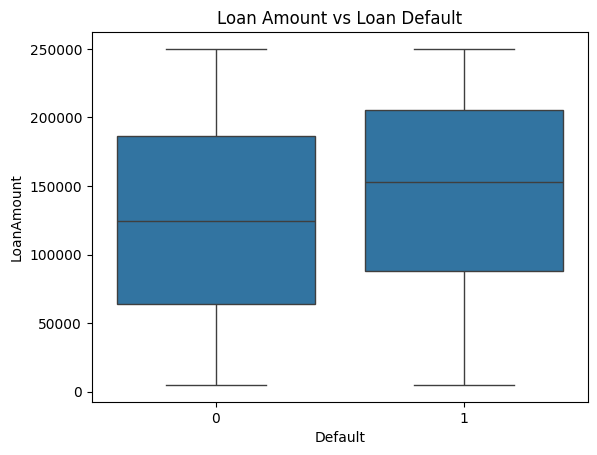

In [19]:
sns.boxplot(x='Default', y='LoanAmount', data=df)
plt.title("Loan Amount vs Loan Default")
plt.show()


Defaulters tend to take higher loan amounts compared to non-defaulters.
 The spread of loan amounts is wider for default cases.

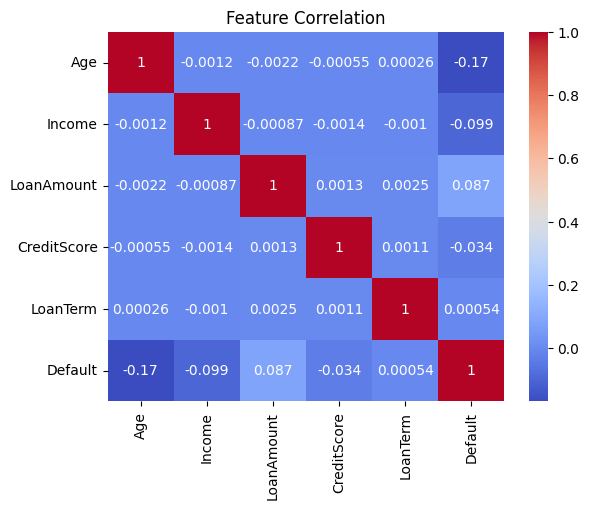

In [20]:
sns.heatmap(
    df[['Age','Income','LoanAmount','CreditScore','LoanTerm','Default']].corr(),
    annot=True, cmap='coolwarm'
)
plt.title("Feature Correlation")
plt.show()


Credit score shows a strong negative correlation with default.

Loan amount and loan term show positive correlation with default.

Income is negatively correlated with default.

Age has weak correlation.

In [21]:
X = df[['Age','Income','LoanAmount','CreditScore','LoanTerm']]
y = df['Default']


In [22]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42, stratify=y
)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [23]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train, y_train)


LogisticRegression()

In [24]:
from sklearn.metrics import accuracy_score, classification_report

y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


Accuracy: 0.8838761219982142
              precision    recall  f1-score   support

           0       0.88      1.00      0.94     56424
           1       0.00      0.00      0.00      7413

    accuracy                           0.88     63837
   macro avg       0.44      0.50      0.47     63837
weighted avg       0.78      0.88      0.83     63837



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


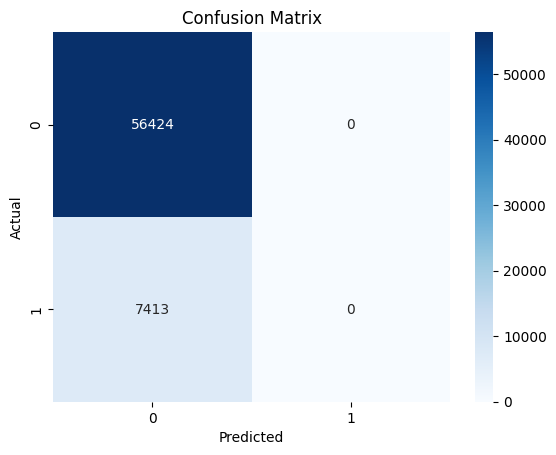

In [25]:
from sklearn.metrics import confusion_matrix

sns.heatmap(confusion_matrix(y_test, y_pred),
            annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


In [26]:
pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': model.coef_[0]
}).sort_values(by='Coefficient', ascending=False)



,Feature,Coefficient
2,LoanAmount,0.281905
4,LoanTerm,0.004205
3,CreditScore,-0.116546
1,Income,-0.324100
0,Age,-0.557093


**Age** (−0.557)

Strongest negative coefficient

As age increases, the probability of loan default decreases significantly.

Older borrowers are more financially stable and less likely to default.

**Income** (−0.324)

Higher income reduces default risk.

Indicates better repayment capacity among higher-income customers.

 **Credit Score** (−0.117)

Negative relationship with default.

Customers with better credit history are less likely to default.

Slightly weaker impact compared to age and income in this dataset.

 **Loan Amount** (+0.282)

Positive coefficient indicates higher loan amounts increase default risk.

Larger loans impose greater financial burden on borrowers.

 **Loan Term** (+0.004)

Very small positive coefficient.

Loan term has minimal influence on default compared to other variables.

The model indicates that age is the strongest factor reducing loan default, with older borrowers being significantly less likely to default. Higher income and better credit scores also lower default risk, reflecting stronger financial stability and repayment capacity. In contrast, larger loan amounts increase the probability of default due to higher financial burden. Loan term has a negligible effect on default compared to other variables.

**Program 2**

In [33]:
import numpy as np
import pandas as pd

np.random.seed(42)

n = 500  # number of customers

data = {
    'Age': np.random.randint(18, 65, n),
    'Monthly_Bill': np.random.randint(300, 2000, n),
    'Data_Usage': np.random.uniform(1, 100, n),
    'Service_Calls': np.random.randint(0, 10, n),
    'Contract_Months': np.random.choice([3, 6, 12, 24], n),
    'Payment_Method': np.random.choice([0, 1], n)  # 0 = Prepaid, 1 = Postpaid
}

df = pd.DataFrame(data)

# Churn logic (realistic behavior)
df['Churn'] = (
    (df['Service_Calls'] > 4) |
    (df['Monthly_Bill'] > 1500) |
    (df['Contract_Months'] <= 6)
).astype(int)

df.head()


,Age,Monthly_Bill,Data_Usage,Service_Calls,Contract_Months,Payment_Method,Churn
0,56,1256,73.945425,8,12,1,1
1,46,990,56.216484,4,24,1,0
2,32,1750,59.067008,9,24,1,1
3,60,1936,56.881396,3,12,0,1
4,25,1591,38.498490,5,6,0,1


In [36]:
df['Churn'].value_counts()


,count
Churn,
1,423
0,77


In [37]:
print(df.isnull().sum())

Age                0
Monthly_Bill       0
Data_Usage         0
Service_Calls      0
Contract_Months    0
Payment_Method     0
Churn              0
dtype: int64


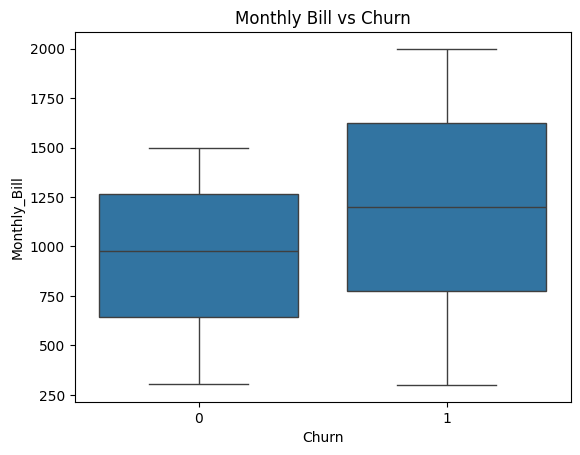

In [38]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.boxplot(x='Churn', y='Monthly_Bill', data=df)
plt.title('Monthly Bill vs Churn')
plt.show()


Customers who churn (1) have a higher median monthly bill than non-churn customers.

Churned customers show a wider spread in bill amounts.

Indicates that higher billing amounts increase churn risk.

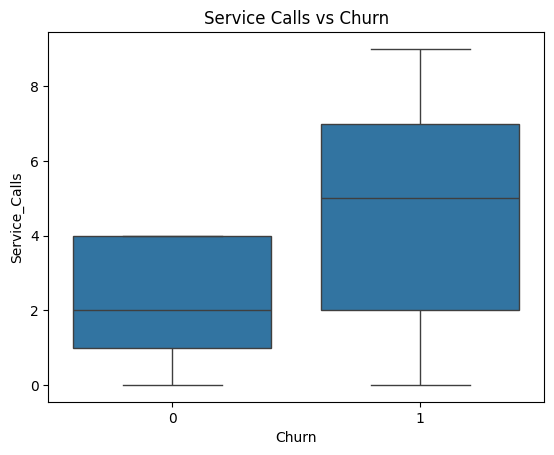

In [39]:
sns.boxplot(x='Churn', y='Service_Calls', data=df)
plt.title('Service Calls vs Churn')
plt.show()


Churned customers make significantly more customer service calls.

Median service calls are much higher for churn = 1.

Strong evidence that frequent service issues lead to churn

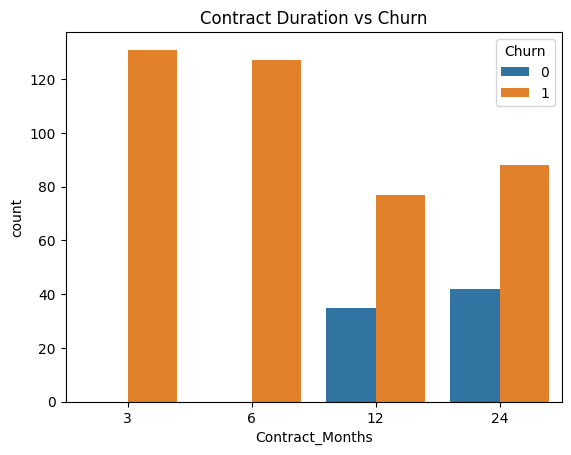

In [40]:
sns.countplot(x='Contract_Months', hue='Churn', data=df)
plt.title('Contract Duration vs Churn')
plt.show()


Short contracts (3 and 6 months) have higher churn counts.

Longer contracts (12 and 24 months) show more non-churn customers.

Confirms that longer contract duration reduces churn.

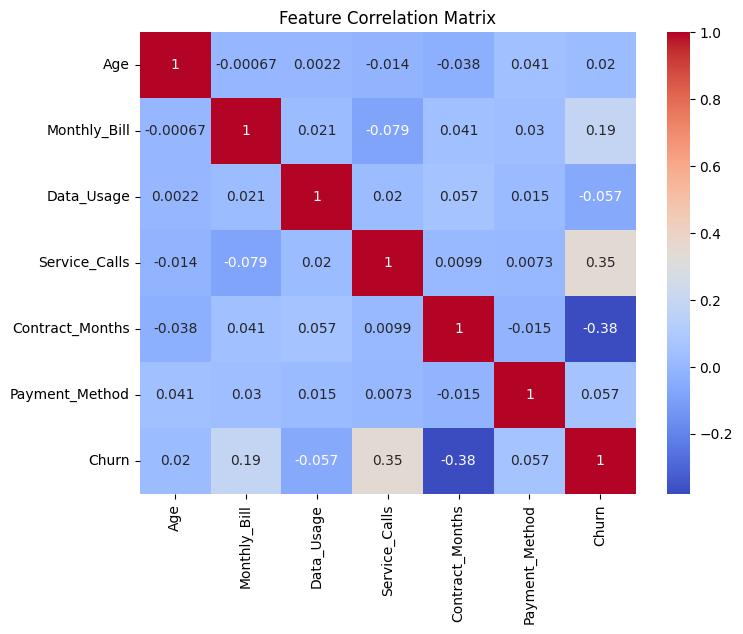

In [41]:
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Feature Correlation Matrix')
plt.show()


Service_Calls (≈ +0.35) has a strong positive correlation with churn.

Contract_Months (≈ −0.38) has a strong negative correlation with churn.

Monthly Bill has a mild positive correlation.

Age and Payment Method show very weak correlation.

Matches Logistic Regression results.

Text(0.5, 1.0, 'Distribution of Monthly Bill by Churn')

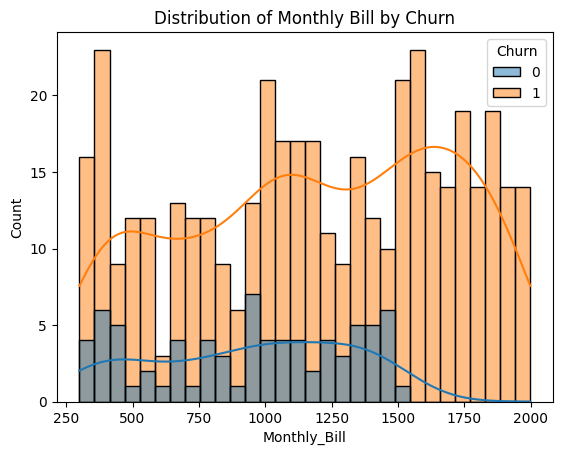

In [42]:
sns.histplot(data=df, x='Monthly_Bill', hue='Churn', kde=True, bins=30)
plt.title("Distribution of Monthly Bill by Churn")


Churned customers are concentrated at higher monthly bill values.

Non-churn customers are more evenly distributed at lower bills.

In [44]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X = df.drop('Churn', axis=1)
y = df['Churn']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42, stratify=y
)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [45]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train, y_train)


LogisticRegression()

In [46]:
y_pred = model.predict(X_test)


In [47]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_pred)
accuracy


0.896

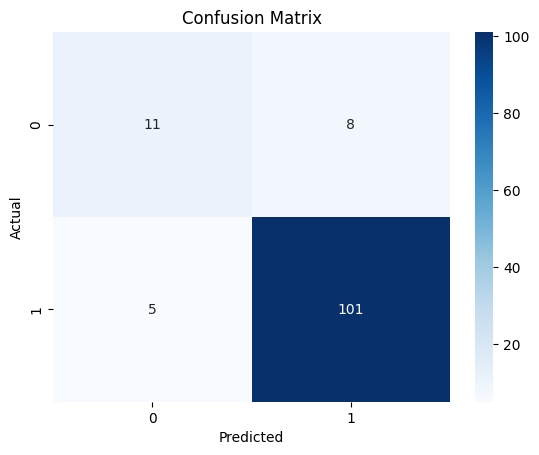

In [48]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


In [49]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.69      0.58      0.63        19
           1       0.93      0.95      0.94       106

    accuracy                           0.90       125
   macro avg       0.81      0.77      0.78       125
weighted avg       0.89      0.90      0.89       125



In [50]:
coefficients = pd.DataFrame({
    'Feature': df.drop('Churn', axis=1).columns,
    'Coefficient': model.coef_[0]
}).sort_values(by='Coefficient', ascending=False)

coefficients


,Feature,Coefficient
3,Service_Calls,2.177882
1,Monthly_Bill,1.478642
5,Payment_Method,0.068925
0,Age,0.016839
2,Data_Usage,-0.188797
4,Contract_Months,-1.775444


Service_Calls (+2.18): Strongest contributor to churn; customers with frequent service calls are much more likely to leave.

Monthly_Bill (+1.48): High monthly charges significantly increase the probability of churn.

Contract_Months (−1.78): Longer contract duration greatly reduces churn; short contracts increase churn risk.

Data_Usage (−0.19): Higher data usage slightly lowers churn, indicating customer dependency on the service.

Payment_Method (+0.07): Very weak positive effect; postpaid users churn marginally more.

Age (+0.02): Negligible impact on churn.

The model  revealed that frequent customer service calls, higher monthly bills, and shorter contract durations are the strongest contributors to churn.